In [1]:
import os
import shutil

import numpy as np
import pickle

In [2]:
# Read GRACE weights (from Isabel Nias)
#s3client = boto3.client('s3',region_name='us-west-2')

#fileobj = s3client.get_object(Bucket='dh-gapc', Key='GrIS_committed_SLR/weights_GRACE.txt') 
#lines = fileobj['Body'].read().decode('utf-8').splitlines()

fileobj = open('results/weights_GRACE_2023-05-08.csv', 'r')
lines = fileobj.read().splitlines()

header = lines[0]
ensembleIDs = list()
weights_mv_sigmamodx2 = list()
weights_mv_sigmamodx4 = list()
weights_mv_sigmamodx8 = list()

for line in lines[1:]:
    line = line.replace('"','').split(',')
    ensembleIDs.append(line[0])
    weights_mv_sigmamodx2.append(float(line[1]))
    weights_mv_sigmamodx4.append(float(line[2]))
    weights_mv_sigmamodx8.append(float(line[3]))

weights_mv_sigmamodx2 = np.array(weights_mv_sigmamodx2)
weights_mv_sigmamodx4 = np.array(weights_mv_sigmamodx4)
weights_mv_sigmamodx8 = np.array(weights_mv_sigmamodx8)


(array([74., 10., 11., 10.,  7.,  7., 11.,  5.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.        , 0.00345192, 0.00690384, 0.01035576, 0.01380769,
        0.01725961, 0.02071153, 0.02416345, 0.02761537, 0.03106729,
        0.03451921, 0.03797114, 0.04142306, 0.04487498, 0.0483269 ,
        0.05177882, 0.05523074, 0.05868267, 0.06213459, 0.06558651,
        0.06903843, 0.07249035, 0.07594227, 0.07939419, 0.08284612,
        0.08629804, 0.08974996, 0.09320188, 0.0966538 , 0.10010572,
        0.10355764, 0.10700957, 0.11046149, 0.11391341, 0.11736533,
        0.12081725, 0.12426917, 0.12772109, 0.13117302, 0.13462494

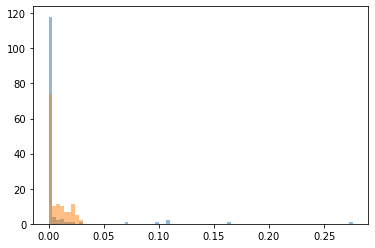

In [3]:
from matplotlib import pyplot as plt

bins = np.histogram(np.hstack((weights_mv_sigmamodx2,weights_mv_sigmamodx8)), bins=80)[1]

plt.hist(weights_mv_sigmamodx2, bins=bins, alpha=0.5)
plt.hist(weights_mv_sigmamodx8, bins=bins, alpha=0.5)


In [4]:
# Write results files (pickle and description)
if os.path.isdir('results/mass_sigmamodx2/'):
    shutil.rmtree('results/mass_sigmamodx2/')

os.mkdir('results/mass_sigmamodx2/')

run_description = 'start_year = 2007; end_year = 2015; grid_size = N/A; residual_sigma_multiplier = 2;'

txt_file = open('results/mass_sigmamodx2/description.txt', 'w')
txt_file.write(run_description)
txt_file.close()

pickle.dump({'s_j': None, 'w_j': weights_mv_sigmamodx2}, open('results/mass_sigmamodx2/weights.p', 'wb'))


In [5]:
# Write results files (pickle and description)
if os.path.isdir('results/mass_sigmamodx4/'):
    shutil.rmtree('results/mass_sigmamodx4/')

os.mkdir('results/mass_sigmamodx4/')

run_description = 'start_year = 2007; end_year = 2015; grid_size = N/A; residual_sigma_multiplier = 4;'

txt_file = open('results/mass_sigmamodx4/description.txt', 'w')
txt_file.write(run_description)
txt_file.close()

pickle.dump({'s_j': None, 'w_j': weights_mv_sigmamodx4}, open('results/mass_sigmamodx4/weights.p', 'wb'))


In [6]:
# Write results files (pickle and description)
if os.path.isdir('results/mass_sigmamodx8/'):
    shutil.rmtree('results/mass_sigmamodx8/')

os.mkdir('results/mass_sigmamodx8/')

run_description = 'start_year = 2007; end_year = 2015; grid_size = N/A; residual_sigma_multiplier = 8;'

txt_file = open('results/mass_sigmamodx8/description.txt', 'w')
txt_file.write(run_description)
txt_file.close()

pickle.dump({'s_j': None, 'w_j': weights_mv_sigmamodx8}, open('results/mass_sigmamodx8/weights.p', 'wb'))
